## 목표 : 붓꽃 품종 식별 모델
- 데이터 : 3개 품종을 가진 iris.csv
- 피쳐 : 품종
- 타겟 : sepal의 width & length
- 유형 : 지도, 분류

In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

In [2]:
file = '../data/iris.csv'
data = pd.read_csv(file, usecols=[0, 1, 4], header = None)
data.columns = ['sepal_width', 'sepal_length', 'category']
data

,sepal_width,sepal_length,category
0,5.1,3.5,Iris-setosa
1,4.9,3.0,Iris-setosa
2,4.7,3.2,Iris-setosa
3,4.6,3.1,Iris-setosa
4,5.0,3.6,Iris-setosa
...,...,...,...
145,6.7,3.0,Iris-virginica
146,6.3,2.5,Iris-virginica
147,6.5,3.0,Iris-virginica
148,6.2,3.4,Iris-virginica


In [3]:
data['category'] = data['category'].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   sepal_width   150 non-null    float64 
 1   sepal_length  150 non-null    float64 
 2   category      150 non-null    category
dtypes: category(1), float64(2)
memory usage: 2.7 KB


In [4]:
data.category = data.category.replace({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica':2})
data

,sepal_width,sepal_length,category
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


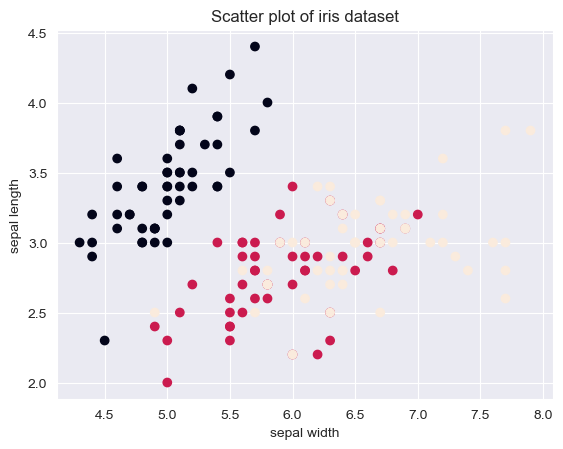

In [5]:
import matplotlib.pyplot as plt

plt.scatter(data['sepal_width'], data['sepal_length'], c = data['category'])
plt.xlabel("sepal width")
plt.ylabel("sepal length")
plt.title('Scatter plot of iris dataset')
plt.show()

##### 기계 학습을 위한 데이터 준비      
- 피쳐/특성 + 타겟/라벨/클래스
- 학습용 데이터셋  : 80%
- 테스트용 데이터셋 : 20%

In [6]:
from sklearn.model_selection import train_test_split 

In [7]:
# 특성과 타겟 분리
featureDF = data[['sepal_width', 'sepal_length']]
targetSR = data['category']

In [8]:
# 학습 셋 & 테스트 셋 분리
## -- [전달] 피쳐 데이터, 타겟 데이터
## -- [기본] shuffle = True
## -- [설정] train:test = 0.9:0.1 => test_size, train_size 매개변수 값 설정
## -- [반환] 학습용 피쳐, 태스트용 피쳐, 학습용 타겟, 테스트용 타겟
X_train, X_test, y_train, y_test = train_test_split(featureDF, targetSR, test_size = 0.2)

In [9]:
print(f"X_train : {X_train.shape}")
print(X_train.head(2))
print()
print(f"y_train : {y_train.shape}")
print(y_train.head(2))
print()
print(f"X_test : {X_test.shape}")
print(X_test.head(2))
print()
print(f"y_test : {y_test.shape}")
print(y_test.head(2))

X_train : (120, 2)
    sepal_width  sepal_length
87          6.3           2.3
66          5.6           3.0

y_train : (120,)
87    1
66    1
Name: category, dtype: category
Categories (3, int64): [0, 1, 2]

X_test : (30, 2)
     sepal_width  sepal_length
124          6.7           3.3
77           6.7           3.0

y_test : (30,)
124    2
77     1
Name: category, dtype: category
Categories (3, int64): [0, 1, 2]


In [10]:
# 검증용 데이터셋 준비 ==> 학습용 데이터셋에서 분리
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1, stratify=y_train)

In [11]:
print(f"X_train : {X_train.shape}")
print(X_train.head(2))
print()
print(f"y_train : {y_train.shape}")
print(y_train.head(2))
print()
print(f"X_val : {X_val.shape}")
print(X_test.head(2))
print()
print(f"y_val : {y_val.shape}")
print(y_test.head(2))

X_train : (108, 2)
     sepal_width  sepal_length
134          6.1           2.6
15           5.7           4.4

y_train : (108,)
134    2
15     0
Name: category, dtype: category
Categories (3, int64): [0, 1, 2]

X_val : (12, 2)
     sepal_width  sepal_length
124          6.7           3.3
77           6.7           3.0

y_val : (12,)
124    2
77     1
Name: category, dtype: category
Categories (3, int64): [0, 1, 2]


In [12]:
# 모델 인스턴스 생성
model = KNeighborsClassifier()
model

KNeighborsClassifier()

In [13]:
# 학습 진행 => 학습용 데이터로 진행
model.fit(X_train, y_train)

KNeighborsClassifier()

In [14]:
# 테스트 진행
model.score(X_val, y_val)

0.75

In [15]:
# 예측 진행
model.predict(X_test)

array([2, 2, 2, 1, 2, 2, 0, 1, 2, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 2, 2, 1,
       1, 0, 1, 2, 2, 2, 0, 1], dtype=int64)

In [16]:
y_test

124    2
77     1
86     1
81     1
52     1
129    2
17     0
106    2
65     1
35     0
108    2
4      0
13     0
78     1
32     0
3      0
41     0
114    2
26     0
130    2
50     1
147    2
67     1
23     0
60     1
79     1
91     1
105    2
39     0
116    2
Name: category, dtype: category
Categories (3, int64): [0, 1, 2]